# Compare phosphoplus and large scale

## Setup

In [ ]:
#| output: False
!pip install git+https://github.com/sky1ove/katlas.git -q

In [ ]:
from katlas.core import *
from katlas.plot import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr, pearsonr

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

## Load data

In [ ]:
df = Data.get_ks_dataset()

In [ ]:
PP = df.query('source == "pplus"').reset_index(drop=True)

LS = df.query('source == "large_scale"').reset_index(drop=True)

## Get overlap

In [ ]:
cnt = PP[PP.kinase_paper.isin(LS.kinase_paper)].kinase_paper.value_counts()

In [ ]:
overlap_PP = cnt[cnt>50]

## Calculate Pearson

In [ ]:
data = []
for k in overlap_PP.index:

    
    PP_k = PP.query(f'kinase_paper=="{k}"')
    LS_k = LS.query(f'kinase_paper=="{k}"')
    
    PP_cnt = PP_k.shape[0]
    LS_cnt = LS_k.shape[0]
    
    PP_paper, PP_full = get_freq(PP_k)
    LS_paper, LS_full = get_freq(LS_k)
    
#     plot_heatmap(PP_paper,f'{k}_PP')
#     plt.show()
#     plt.close()
    
#     plot_heatmap(LS_paper,f'{k}_LS')
#     plt.show()
#     plt.close()
    
    # Get column-wise pearson, then average
    corr_average = PP_full.corrwith(LS_full).mean() # average pearson across each position
    
    # Get pearson of full heatmap, then average
    corr_full,_ = pearsonr(PP_full.unstack().values,LS_full.unstack().values)

    # print(f'correlation between PP and LS for {k} is: {corr}')
    # corr = plot_corr(PP_full.values.ravel(), LS_full.values.ravel())
    
    data.append([k,corr_average,corr_full,PP_cnt,LS_cnt])

In [ ]:
PP_LS = pd.DataFrame(data,columns=['kinase','corr_average','corr_full',
                                   'PP_cnt','LS_cnt'])

In [ ]:
# PP_LS.to_csv('PP_LS_comparison.csv',index=False)

In [ ]:
PP_LS.sort_values('corr_full')

,kinase,corr_average,corr_full,PP_cnt,LS_cnt
38,LRRK2,0.404499,0.420180,100,59
23,MTOR,0.333832,0.619247,154,56
51,TTK,0.515173,0.658960,68,30
56,CDK7,0.356539,0.665259,60,177
30,PKCE,0.438227,0.678041,113,122
...,...,...,...,...,...
1,CDK1,0.842599,0.925123,807,518
28,LYN,0.747711,0.928041,118,1145
2,CK2A1,0.859749,0.930011,784,135
19,FYN,0.781510,0.936618,210,1560


In [ ]:
PP_LS['min_cnt'] = PP_LS[['PP_cnt','LS_cnt']].min(axis=1)

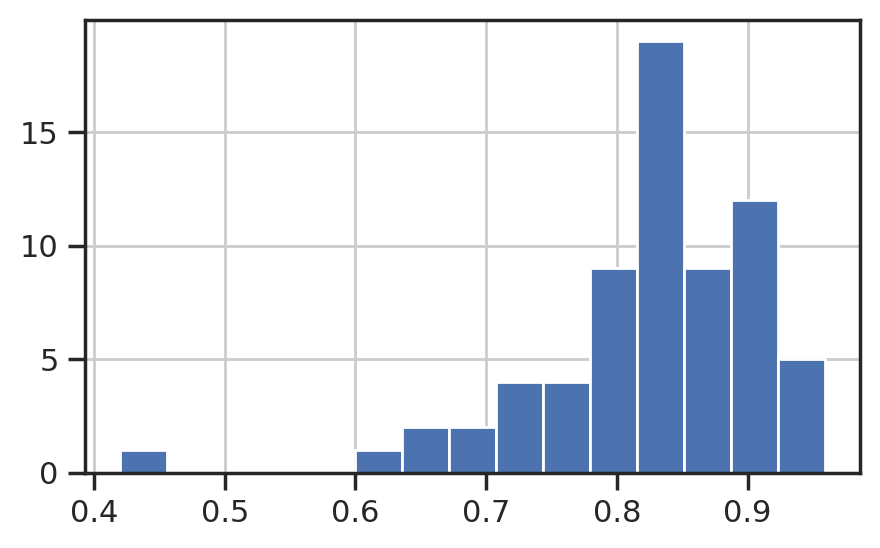

In [ ]:
plt.figure(figsize=(5,3))
PP_LS.corr_full.hist(bins=15);

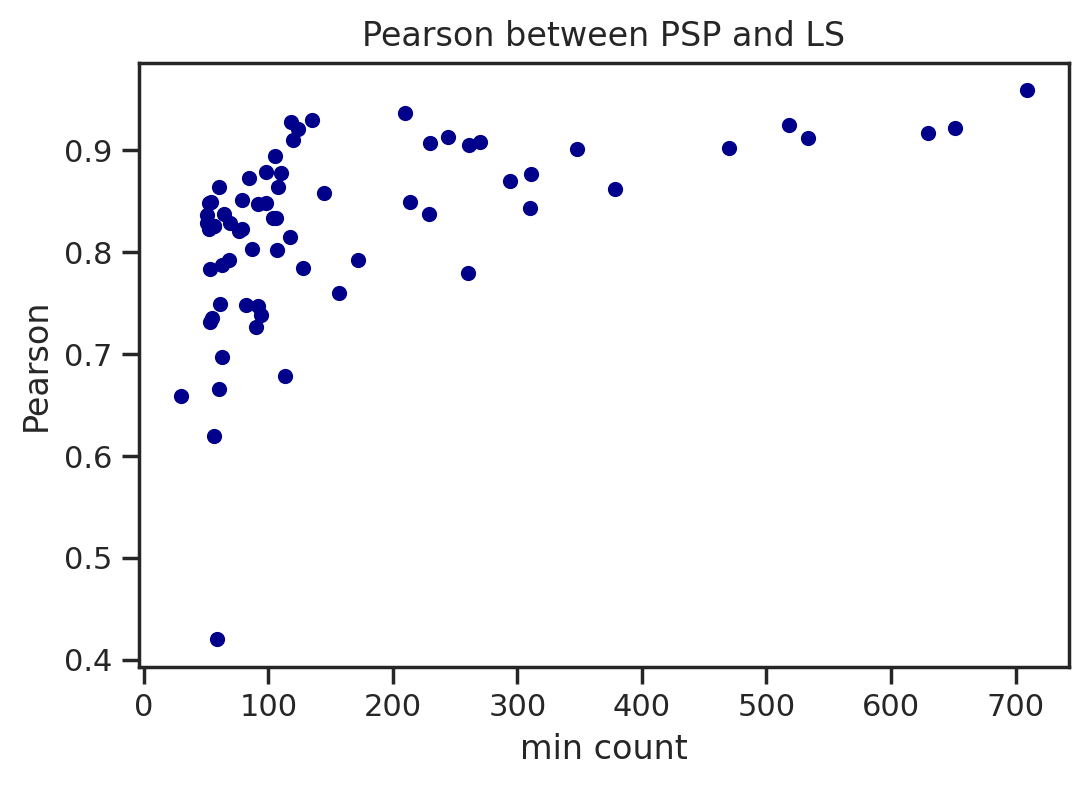

In [ ]:
PP_LS.plot.scatter(y='corr_full',x='min_cnt',c = 'DarkBlue')
plt.ylabel('Pearson')
plt.xlabel('min count')
plt.title('Pearson between PSP and LS');

## Examples

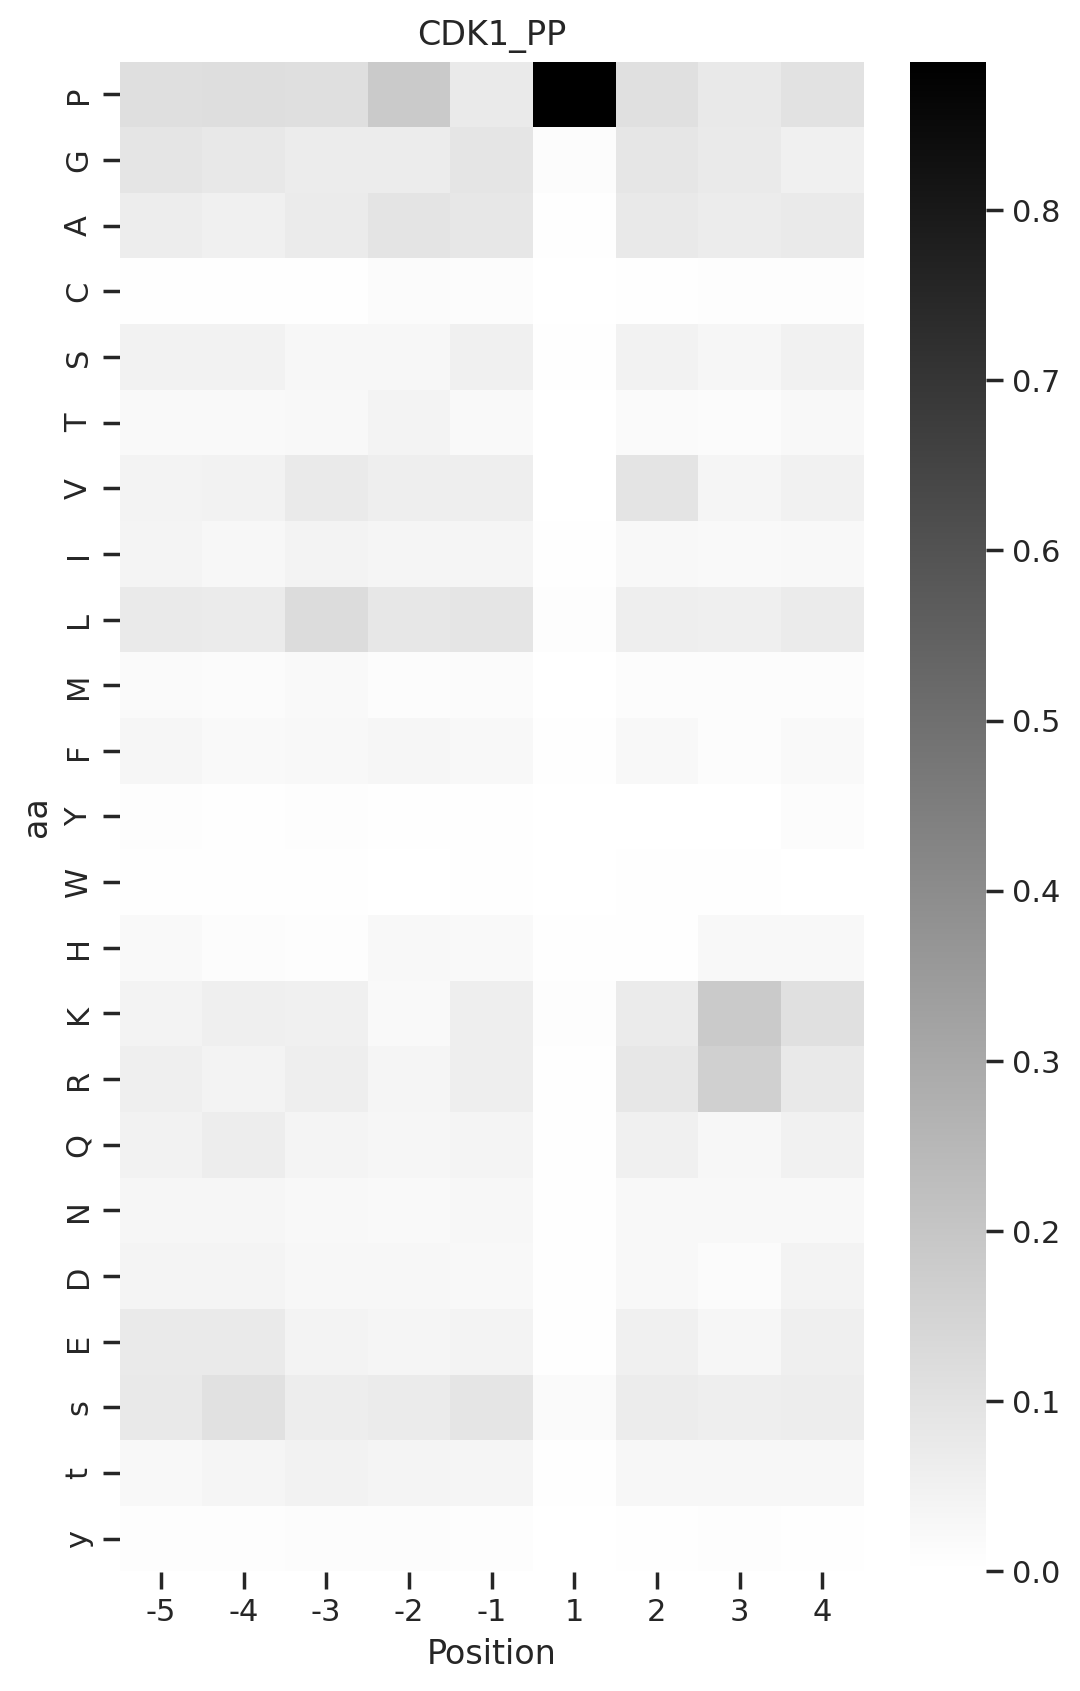

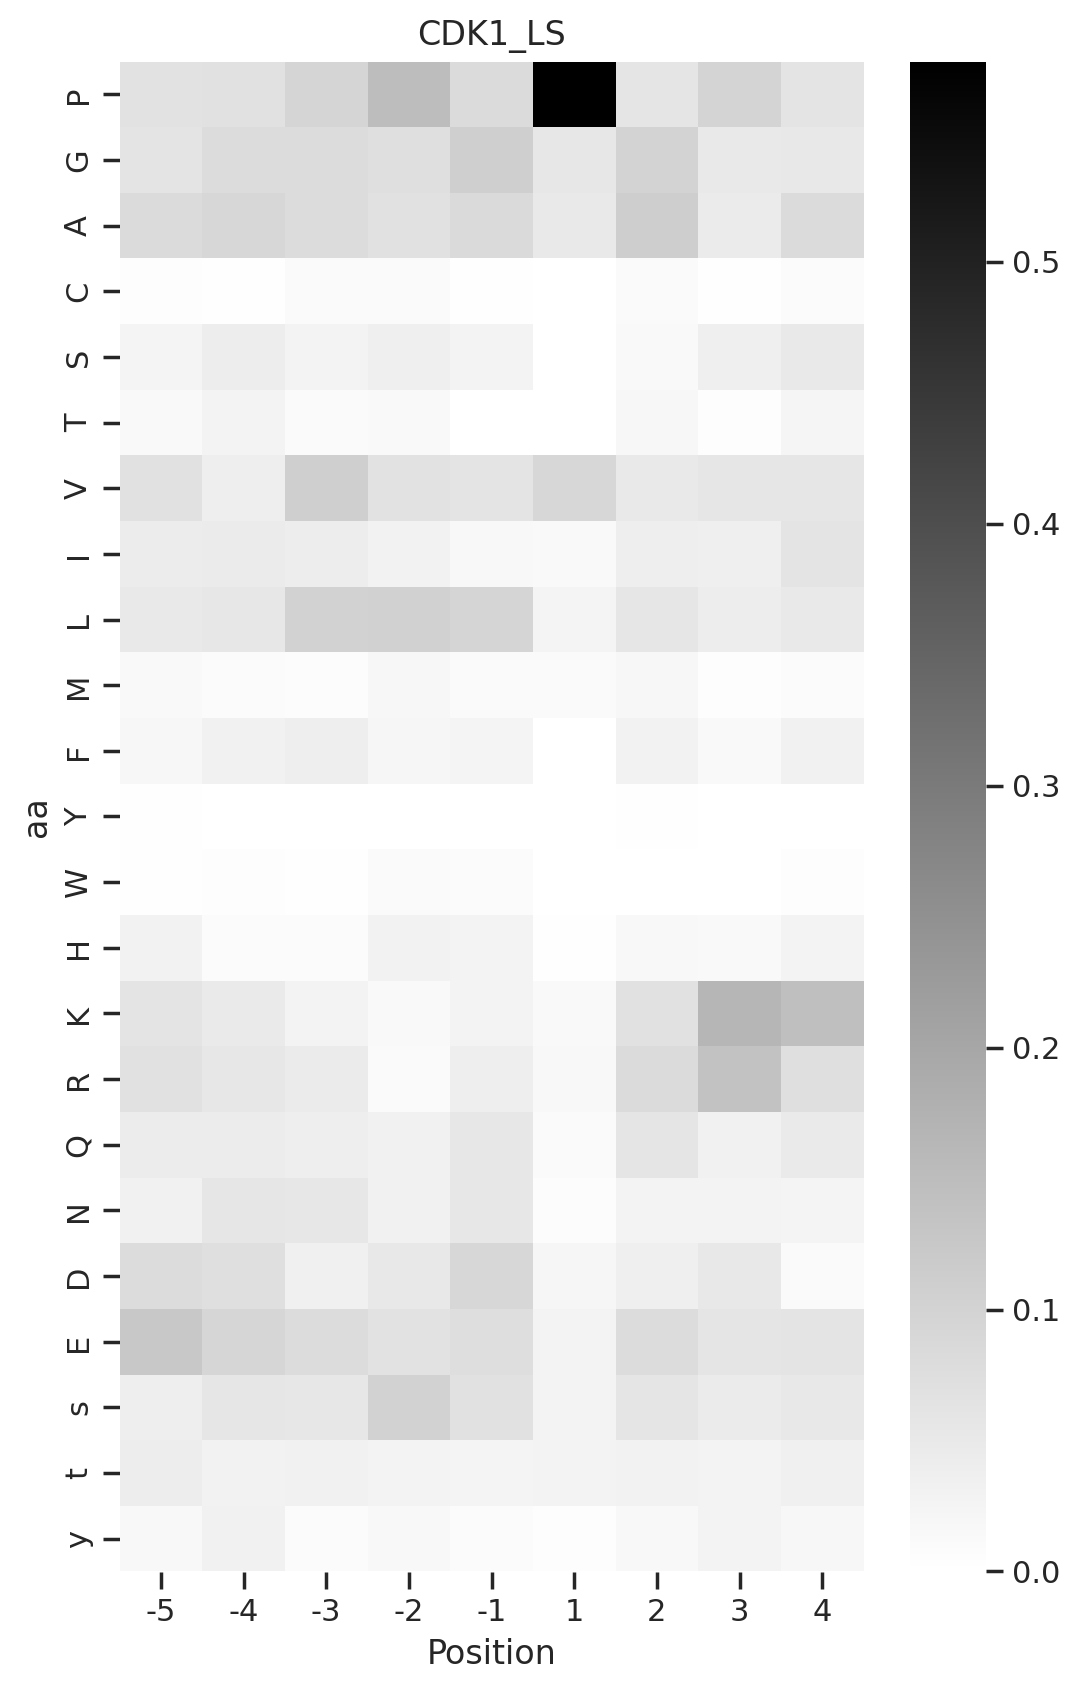

In [ ]:
# Get one example
k = 'CDK1'

PP_k = PP.query(f'kinase_paper=="{k}"')
LS_k = LS.query(f'kinase_paper=="{k}"')


PP_paper, PP_full = get_freq(PP_k)
LS_paper, LS_full = get_freq(LS_k)


plot_heatmap(PP_paper,f'{k}_PP')
plot_heatmap(LS_paper,f'{k}_LS')

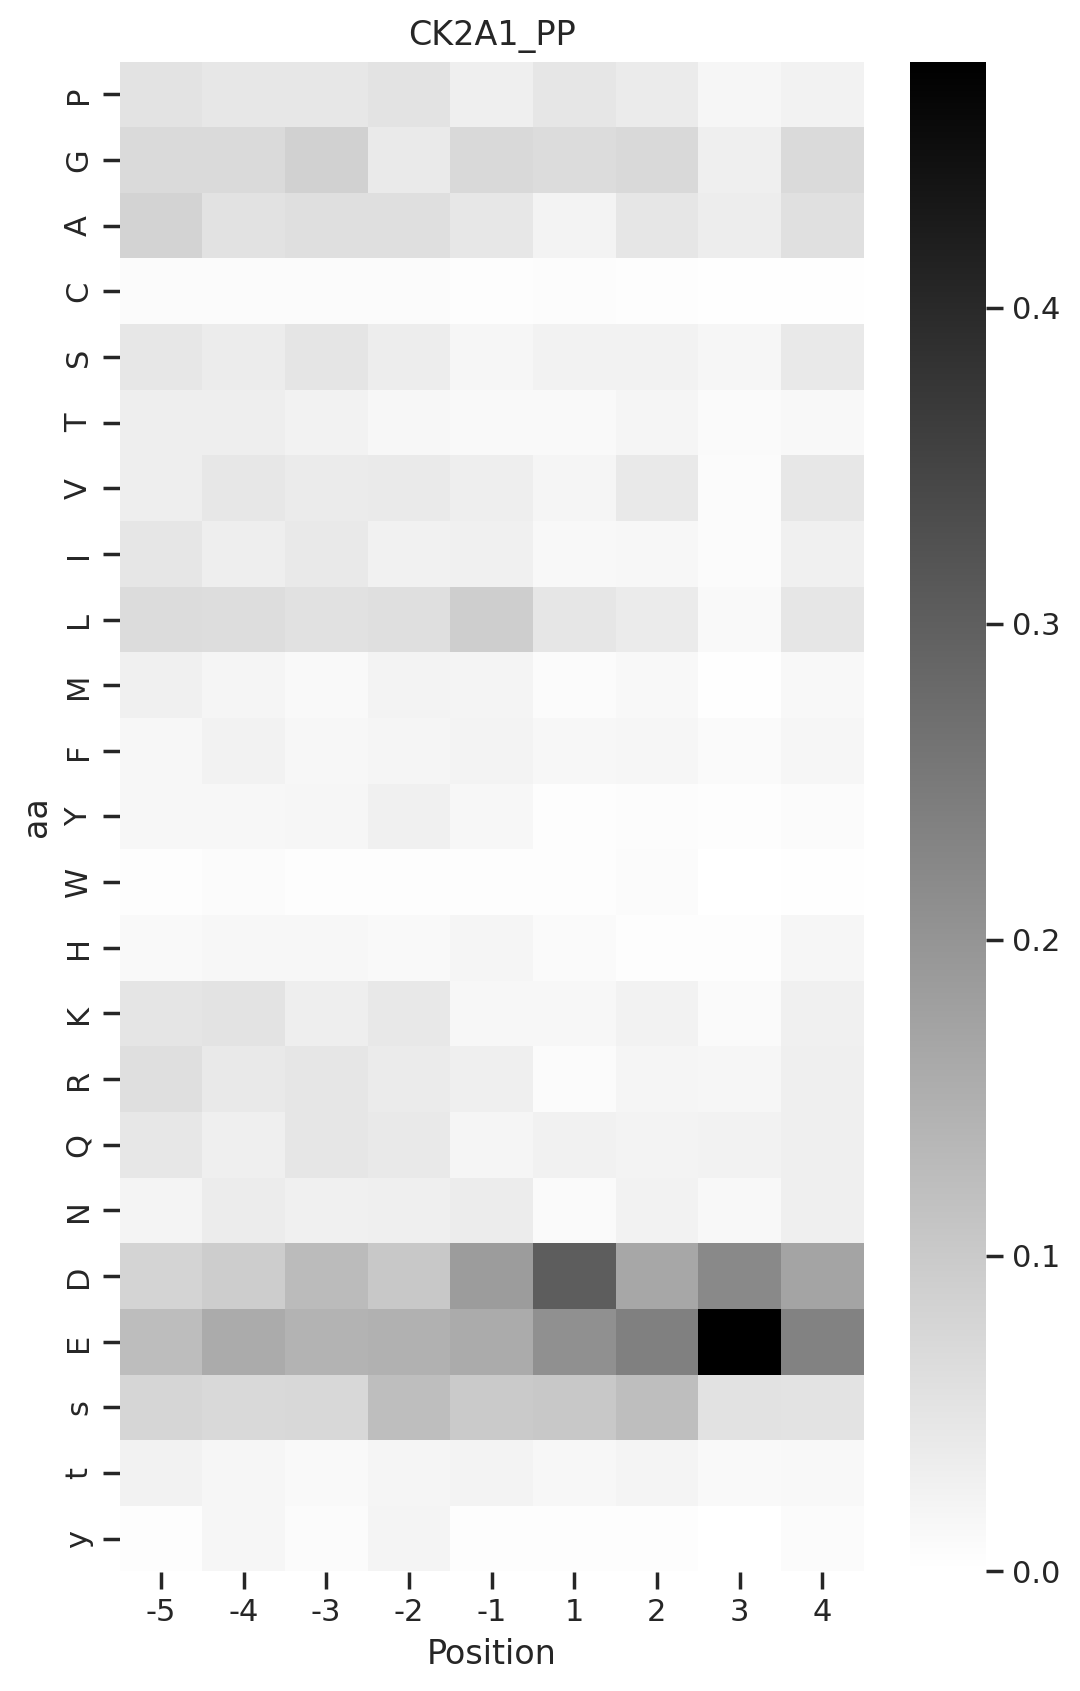

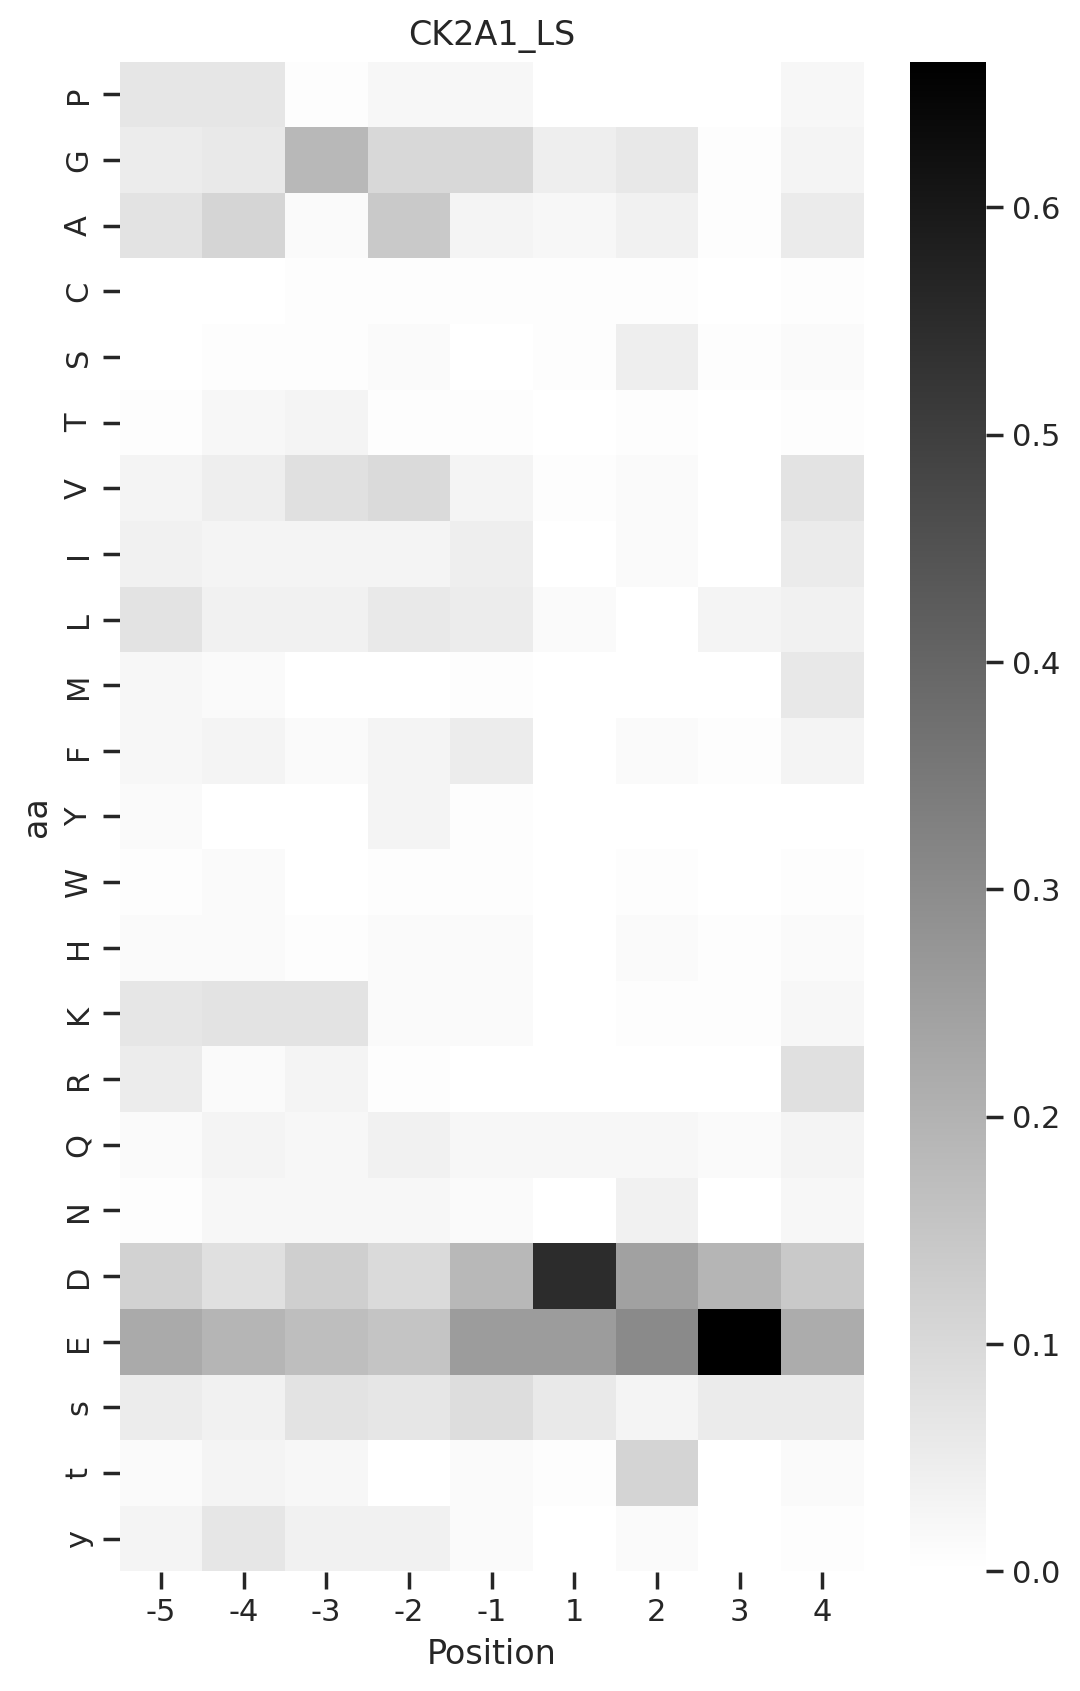

In [ ]:
k = 'CK2A1'

PP_k = PP.query(f'kinase_paper=="{k}"')
LS_k = LS.query(f'kinase_paper=="{k}"')


PP_paper, PP_full = get_freq(PP_k)
LS_paper, LS_full = get_freq(LS_k)


plot_heatmap(PP_paper,f'{k}_PP')
plot_heatmap(LS_paper,f'{k}_LS')